**Model Evaluation**

# Failure of Accuracy

In [ ]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [ ]:
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv)
    return scores

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

In [ ]:
model = DummyClassifier(strategy='most_frequent')

In [ ]:
scores = evaluate_model(X, y, model)

In [ ]:
print(f'Mean Accuracy: {scores.mean()*100 : 0.2f}%')

# Precision, Recall, and F-measure

### Calculate Precision

calculates precision for 1:100 dataset with 90 tp and 30 fp

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg

In [ ]:
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print(f'Precision: {precision: 0.3f}')

Precision:  0.750


Calculates precision for 1:1:100 dataset with 50tp, 20fp, 99tp, 51fp

In [ ]:
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg

# define predictions
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg

In [ ]:
# calculate prediction
precision = precision_score(y_true, y_pred, labels=[1,2], average= 'micro')
print( ' Precision: %.3f ' % precision)

 Precision: 0.677 


### Calculate Recall

Calculates recall for 1:100 dataset with 90 tp and 10 fn

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos + pred_neg

In [ ]:
# calculate recall
recall = recall_score(y_true, y_pred, average='binary')
print(f'Recall: {recall: .3f}')

Recall:  0.900


Calculates recall for 1:1:100 dataset with 77tp, 23fn and 95tp, 5fn

In [ ]:
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg

In [ ]:
# define predictions
pred_pos1 = [0 for _ in range(23)] + [1 for _ in range(77)]
pred_pos2 = [0 for _ in range(5)] + [2 for _ in range(95)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos1 + pred_pos2 + pred_neg

In [ ]:
# calculate recall
recall = recall_score(y_true, y_pred, labels=[1,2], average='micro')
print(f'Recall: {recall:.3f}')

Recall: 0.860


### F-measure

Calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

In [ ]:
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg

In [ ]:
# calculate score
score = f1_score(y_true, y_pred, average= 'binary')
print(f'F-measure: {score: .3f} ')

F-measure:  0.760 


# ROC Curves and Precision-Recall Curves

In [ ]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from matplotlib import pyplot

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [ ]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

**ROC Curves and ROC AUC**

In [ ]:
model = LogisticRegression(solver='lbfgs')

In [ ]:
model.fit(trainX, traiy)

LogisticRegression()

In [ ]:
yhat = model.predict_proba(testX)

In [ ]:
pos_probs = yhat[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(testy, pos_probs)

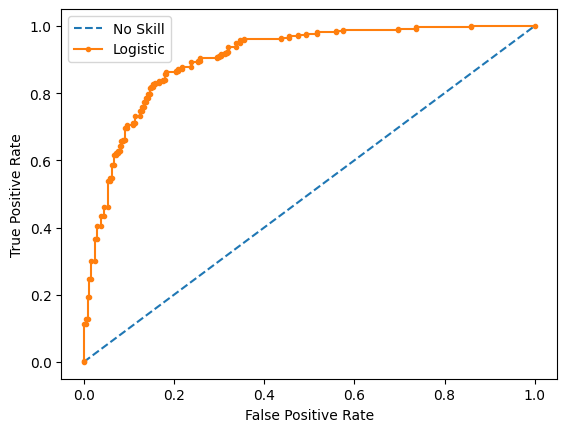

In [ ]:
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker= '.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**ROC Area Under Curve (AUC) Score**

In [ ]:
model = DummyClassifier(strategy='stratified')

In [ ]:
model.fit(trainX, traiy)

DummyClassifier(strategy='stratified')

In [ ]:
yhat = model.predict_proba(testX)

In [ ]:
pos_probs = yhat[:, 1]

In [ ]:
roc_auc = roc_auc_score(testy, pos_probs)
print(f'No skill ROC AUC {roc_auc: .3f}')

No skill ROC AUC  0.472


In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, traiy)

LogisticRegression()

In [ ]:
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]

In [ ]:
roc_auc = roc_auc_score(testy, pos_probs)
print(f'Logistic ROC AUC {roc_auc: 0.3f}')

Logistic ROC AUC  0.903


**Precision-Recall Curves and AUC**

In [ ]:
no_skill = len(y[y==1]) / len(y)

In [ ]:
precision, recall, _ = precision_recall_curve(testy, pos_probs)

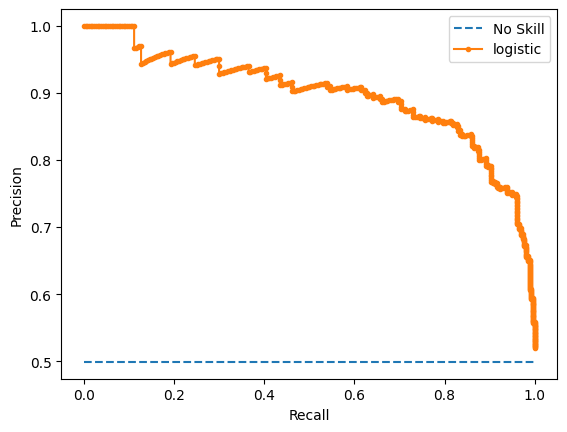

In [ ]:
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

**Precision-Recall Area Under Curve (AUC) Score**

In [ ]:
from sklearn.metrics import auc

In [ ]:
model = DummyClassifier(strategy='stratified')
model.fit(trainX, traiy)

DummyClassifier(strategy='stratified')

In [ ]:
yhat = model.predict_proba(testX)

In [ ]:
pos_probs = yhat[:,1]

In [ ]:
precision, recall, _ = precision_recall_curve(testy, pos_probs)
auc_score = auc(recall, precision)
print(f'No Skill PR AUC: {auc_score: 0.3f}')

No Skill PR AUC:  0.607


In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]

In [ ]:
precision, recall, _ = precision_recall_curve(testy, pos_probs)
auc_score = auc(recall, precision)
print(f'Logistic PR AUC: {auc_score: 0.3f}')

Logistic PR AUC:  0.898


# Probability Scoring Methods

# Cross-Validation for Imbalanced Datasets